# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>



All patients whose data has been collected are females at least 21 years old of Pima Indian heritage


In [0]:
#Import all the necessary modules
import pandas as pd 
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [0]:
dbt_df=pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/internal/pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [0]:
dbt_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [0]:
dbt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [0]:
boolean_df=(dbt_df==0) #stroring boolean 
boolean_df[boolean_df==True].count() # then count 

# here Logically , Plass,Press,Skin,Test,mass should not be zero
median_without_zero=dbt_df[dbt_df != 0 ].median()

median_without_zero.loc[['Plas','Pres','skin','test','mass','pedi']]
#need to replace meadian to zero column

cols=['Plas','Pres','skin','test','mass','pedi']
for col in cols :
  dbt_df[col].replace(0,median_without_zero[col],inplace=True)
  
  


#dbt_df.loc[dbt_df==0,['Plas','Pres','skin','test','mass']]=median_without_zero.loc[['Plas','Pres','skin','test','mass']]
#dbt_df[dbt_df==0]
#print the row and column where is 0
#dbt_df.loc[]
#dbt_df.loc[dbt_df==0,]
#nonzero_median = dbt_df[ dbt_df != 0 ].median()
#nonzero_median

In [0]:
dbt_df[dbt_df==0].count()

Preg     111
Plas       0
Pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class    500
dtype: int64

# Q5 Print the descriptive statistics of each & every column using describe() function

In [0]:
dbt_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
##Plas col is not distributed normally seeing mean and median lots difference.same is with skin,test
#press is perfect normally distributed 
#q3-q2>q2-q1 will tell skewness right side

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

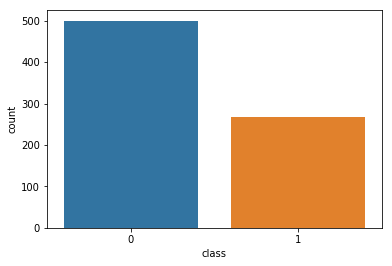

In [0]:
sns.countplot(x='class',data=dbt_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights. 


Using the plot - infer the relationship between different variables

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


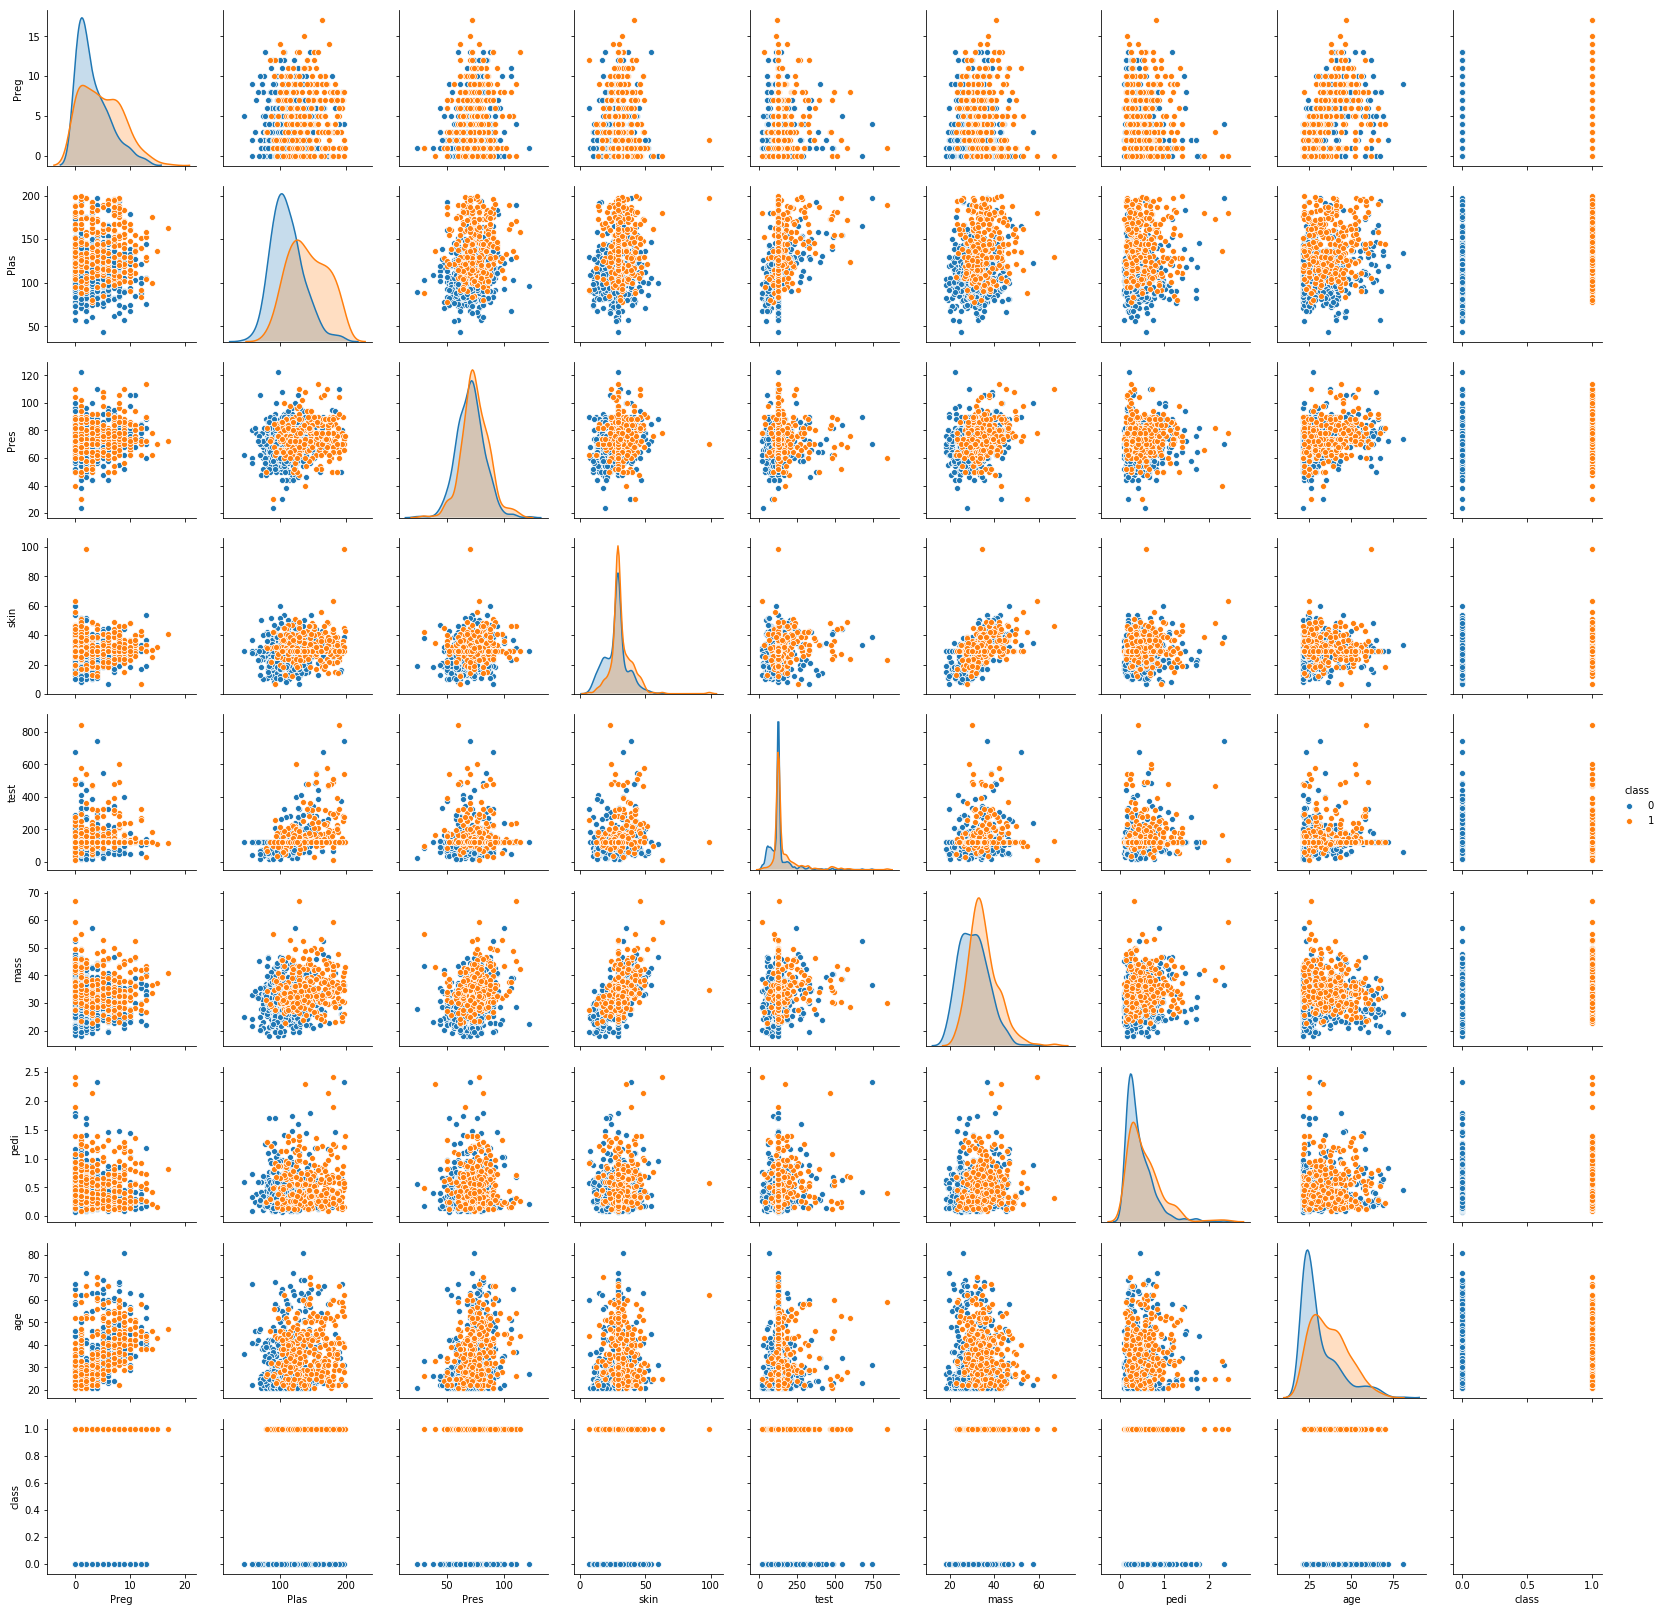

In [0]:
sns.pairplot(dbt_df,hue='class')

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=dbt_df.iloc[:,0:8]
Y=dbt_df.iloc[:,8]
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [113]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_samples_split=2 )
dt_model.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [114]:
y_predict=dt_model.predict(X_test)
dt_model.score(X_test,Y_test)
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, y_predict))

[[127  23]
 [ 44  37]]


Print the feature importance of the decision model - Optional